# Setup

In [1]:
import sys
sys.path.append('/mnt/c/Users/Arnisa/Desktop/MP/mp-tl-study')
from functions.visualization_utils import *

## Load Data

In [2]:
# OR LOAD ARI Scores
with open("results/regular_cluster.json", "r") as f:
    scores_all = json.load(f)
df = pd.DataFrame(scores_all)

df.head()

,Percentage,Repeat,Num Samples,Layer,PPR,Dataset,Split
0,0.001,0,0,conv0,68.888889,Finetune,Train
1,0.001,0,0,conv1,42.222222,Finetune,Train
2,0.001,0,0,conv2,68.888889,Finetune,Train
3,0.001,0,0,conv3,55.555556,Finetune,Train
4,0.001,0,0,conv4,53.333333,Finetune,Train


## Plot

In [3]:
map_to_cuts = {
    "conv0":1,
    "conv1":2,
    "conv2":3,
    "conv3":4,
    "conv4":5,
    "conv5":6,
}

tick_labels_dict = {
    1: "Conv0",
    2: "Conv1",
    3: "Conv2",
    4: "Conv3",
    5: "Conv4",
    6: "Conv5",
}

/home/arnisa/anaconda3/envs/mp-env/lib/python3.7/site-packages/scipy/stats/morestats.py:3141: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


<module 'matplotlib.pyplot' from '/home/arnisa/anaconda3/envs/mp-env/lib/python3.7/site-packages/matplotlib/pyplot.py'>

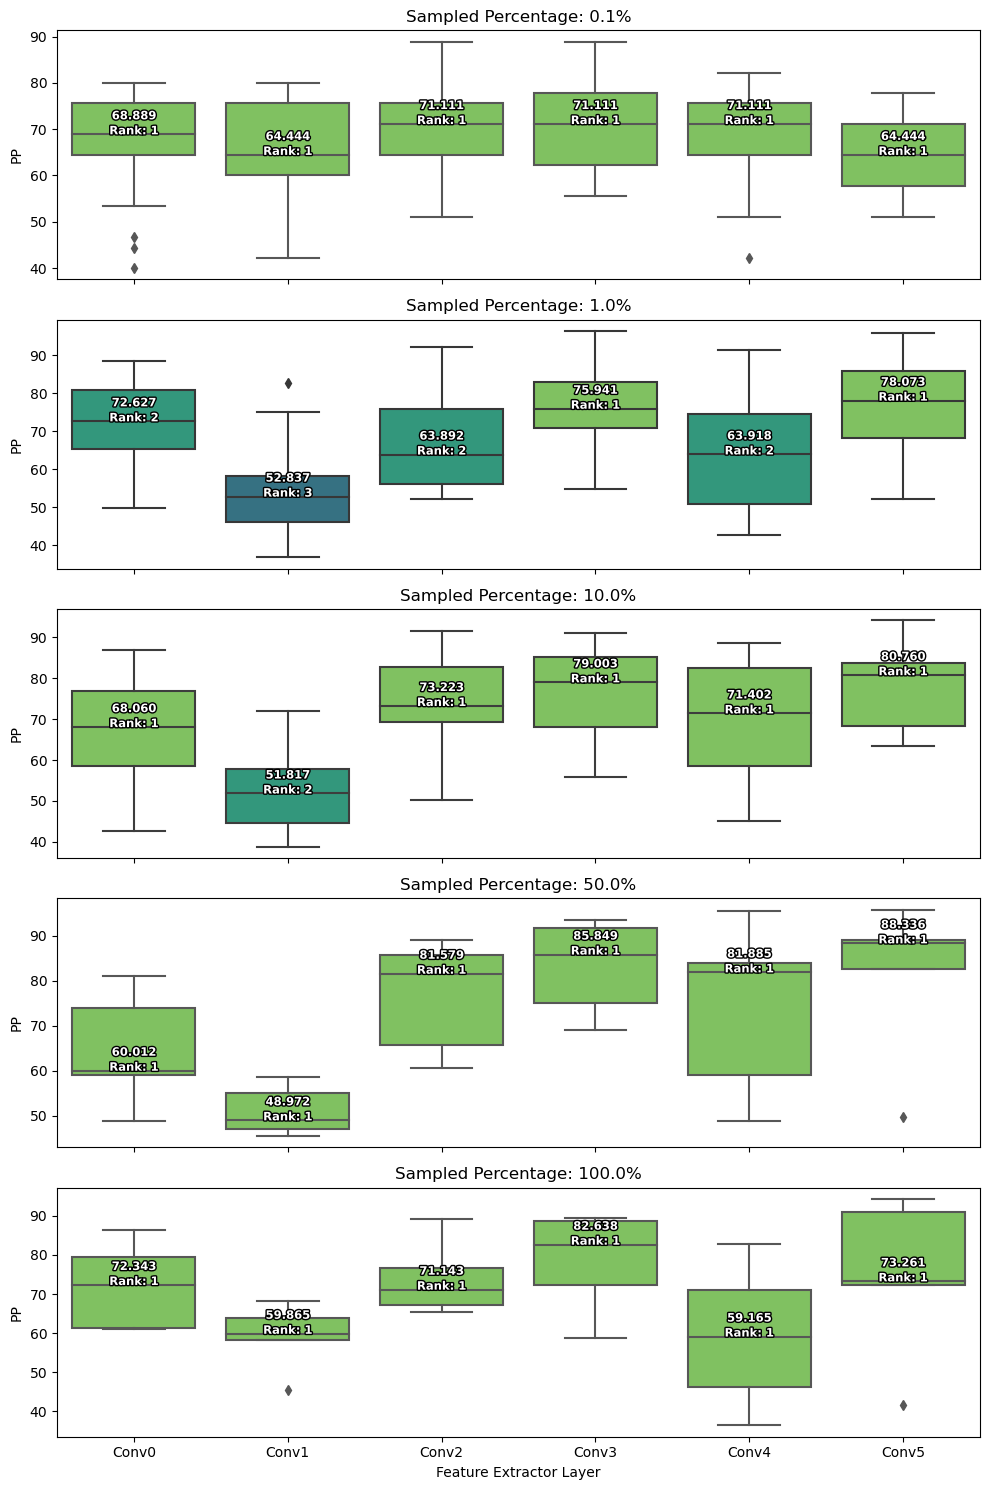

In [4]:
df = df[df["Layer"].isin(map_to_cuts.keys())]
df["Cut Point"] = df["Layer"].map(map_to_cuts)
df['Test Accuracy'] = df['PPR']
# run statistical tests below to get the df_rankings
_, df_rankings = get_rankings(df=df)
cluster_box_plot(df=df, rank_df=df_rankings, add_baseline=False, tick_labels_dict=tick_labels_dict)

# 2. Statistical Tests

### Tables for Ranking Cuts
Also can be used with df_other

In [10]:
df_wilcoxon_pairwise, _ = get_rankings(df=df)

df_wilcoxon_pairwise["statistic"] = df_wilcoxon_pairwise["statistic"].astype(int)

latex_table = df_wilcoxon_pairwise.to_latex(index=False, float_format="%.6f")

rows = latex_table.split("\n")[4:-3]
header = latex_table.split("\n")[:4]
footer = latex_table.split("\n")[-3:]

# iterate over the rows and the df_wilcoxon_pairwise
for i, row in enumerate(rows):
    # print(row)
    row = row.split(" & ")   
    # print(float(row[0].lstrip())*100)
    row = " & ".join([str(float(row[0].lstrip())*100)[:5]] + row[1:-1])
    if df_wilcoxon_pairwise.iloc[i]["is_significant"]:
        row = "\\rowcolor{green!20}\n" + row
    
    rows[i] = row + " \\\\"

# join the header, rows and footer, putting a "\\" at the end of each row
latex_table = "\n".join(rows)

/home/arnisa/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


In [11]:
print(latex_table)

0.1 & 1 & 2 & 53 & 0.711831 \\
0.1 & 1 & 3 & 79 & 0.204120 \\
0.1 & 1 & 4 & 94 & 0.298437 \\
0.1 & 1 & 5 & 102 & 0.435483 \\
0.1 & 1 & 6 & 109 & 0.385542 \\
0.1 & 2 & 3 & 71 & 0.073915 \\
0.1 & 2 & 4 & 85 & 0.106558 \\
0.1 & 2 & 5 & 90 & 0.235525 \\
0.1 & 2 & 6 & 144 & 0.875025 \\
0.1 & 3 & 4 & 47 & 0.729571 \\
0.1 & 3 & 5 & 51 & 0.378816 \\
\rowcolor{green!20}
0.1 & 3 & 6 & 25 & 0.025959 \\
0.1 & 4 & 5 & 52 & 0.649365 \\
\rowcolor{green!20}
0.1 & 4 & 6 & 33 & 0.021915 \\
0.1 & 5 & 6 & 49 & 0.111758 \\
\rowcolor{green!20}
1.0 & 1 & 2 & 16 & 0.000010 \\
1.0 & 1 & 3 & 122 & 0.287229 \\
1.0 & 1 & 4 & 116 & 0.219986 \\
\rowcolor{green!20}
1.0 & 1 & 5 & 68 & 0.009635 \\
\rowcolor{green!20}
1.0 & 1 & 6 & 80 & 0.025505 \\
\rowcolor{green!20}
1.0 & 2 & 3 & 39 & 0.000430 \\
\rowcolor{green!20}
1.0 & 2 & 4 & 13 & 0.000005 \\
\rowcolor{green!20}
1.0 & 2 & 5 & 65 & 0.007371 \\
\rowcolor{green!20}
1.0 & 2 & 6 & 10 & 0.000003 \\
\rowcolor{green!20}
1.0 & 3 & 4 & 78 & 0.021908 \\
1.0 & 3 & 5 & 130 & 